<a href="https://colab.research.google.com/github/Sanjeevp-07/SolarXchange_ML/blob/main/SolarXchange_fec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
# Mount Google Drive if files are stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/SolarXchange/intermittent-renewables-production-france.csv')  # Replace with your dataset path

# Check the first few rows
print(df.head())


               Date and Hour        Date StartHour   EndHour Source  \
0  2020-07-22 20:00:00+02:00  2020-07-22  20:00:00  21:00:00  Solar   
1  2020-07-23 07:00:00+02:00  2020-07-23  07:00:00  08:00:00  Solar   
2  2020-07-23 16:00:00+02:00  2020-07-23  16:00:00  17:00:00  Solar   
3  2020-07-23 19:00:00+02:00  2020-07-23  19:00:00  20:00:00  Solar   
4  2020-07-23 23:00:00+02:00  2020-07-23  23:00:00  24:00:00  Solar   

   Production  dayOfYear    dayName monthName  
0       244.0        204  Wednesday      July  
1       223.0        205   Thursday      July  
2      2517.0        205   Thursday      July  
3       658.0        205   Thursday      July  
4         0.0        205   Thursday      July  


<ipython-input-5-84b08479817c>:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])
<ipython-input-5-84b08479817c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])


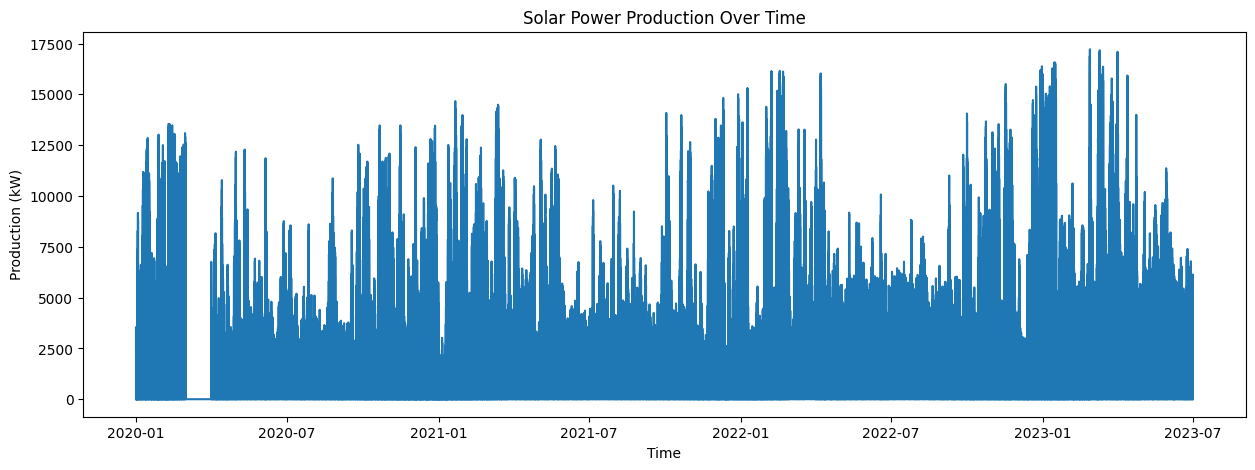

                           Production
Date and Hour                        
2020-01-01 00:00:00+01:00         0.0
2020-01-01 00:00:00+01:00      3549.0
2020-01-01 01:00:00+01:00         0.0
2020-01-01 01:00:00+01:00      2952.0
2020-01-01 02:00:00+01:00         0.0


In [ ]:
# Focus only on 'Date and Hour' and 'Production'
data = df[['Date and Hour', 'Production']]

# Convert 'Date and Hour' to datetime format
data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])

# Set 'Date and Hour' as index
data.set_index('Date and Hour', inplace= True)

# Sort by Date (important for time series)
data = data.sort_index()

# Plot to see the energy production pattern
plt.figure(figsize=(15,5))
plt.plot(data['Production'])
plt.title('Solar Power Production Over Time')
plt.xlabel('Time')
plt.ylabel('Production (kW)')
plt.show()

# Display final prepared data
print(data.head())


                           Production
Date and Hour                        
2020-01-01 00:00:00+01:00    0.000000
2020-01-01 00:00:00+01:00    0.206098
2020-01-01 01:00:00+01:00    0.000000
2020-01-01 01:00:00+01:00    0.171429
2020-01-01 02:00:00+01:00    0.000000


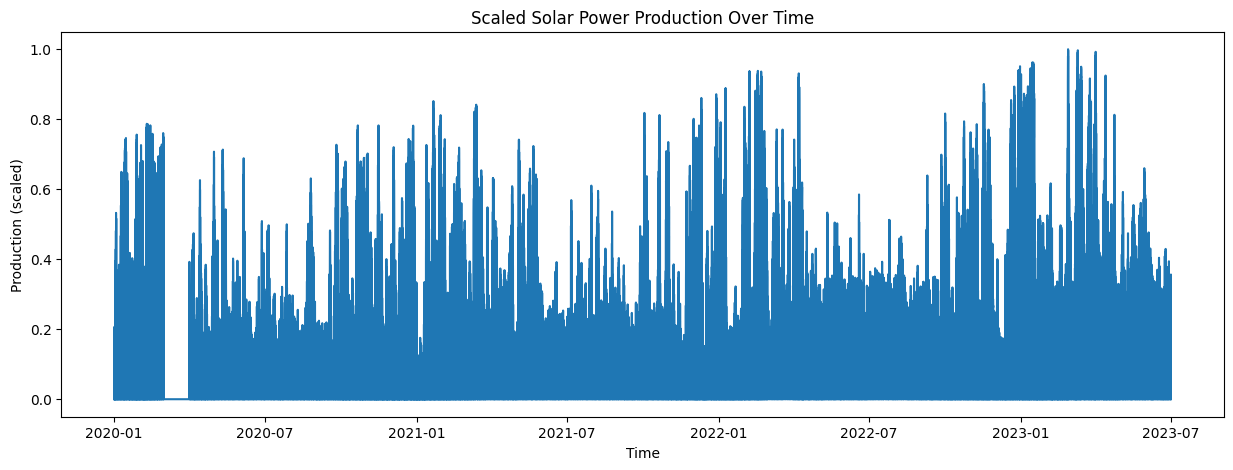

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the production values
data['Production'] = scaler.fit_transform(data[['Production']])

# Show scaled data
print(data.head())

# Plot scaled data
plt.figure(figsize=(15,5))
plt.plot(data['Production'])
plt.title('Scaled Solar Power Production Over Time')
plt.xlabel('Time')
plt.ylabel('Production (scaled)')
plt.show()


In [ ]:
import numpy as np

# Define how many past hours you want to use to predict the next hour
timesteps = 24  # You can change this to 48, 72, etc. if you want

# Create sequences
X = []
y = []

for i in range(timesteps, len(data)):
    X.append(data['Production'].values[i-timesteps:i])
    y.append(data['Production'].values[i])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (59782, 24, 1)
y shape: (59782,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# First LSTM Layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))

# Second LSTM Layer
model.add(LSTM(units=50, activation='relu'))

# Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - loss: nan
Epoch 2/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 3/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 4/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - loss: nan
Epoch 5/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - loss: nan
Epoch 6/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - loss: nan
Epoch 7/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 8/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: nan
Epoch 9/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 10/10
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: nan


1869/1869 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step


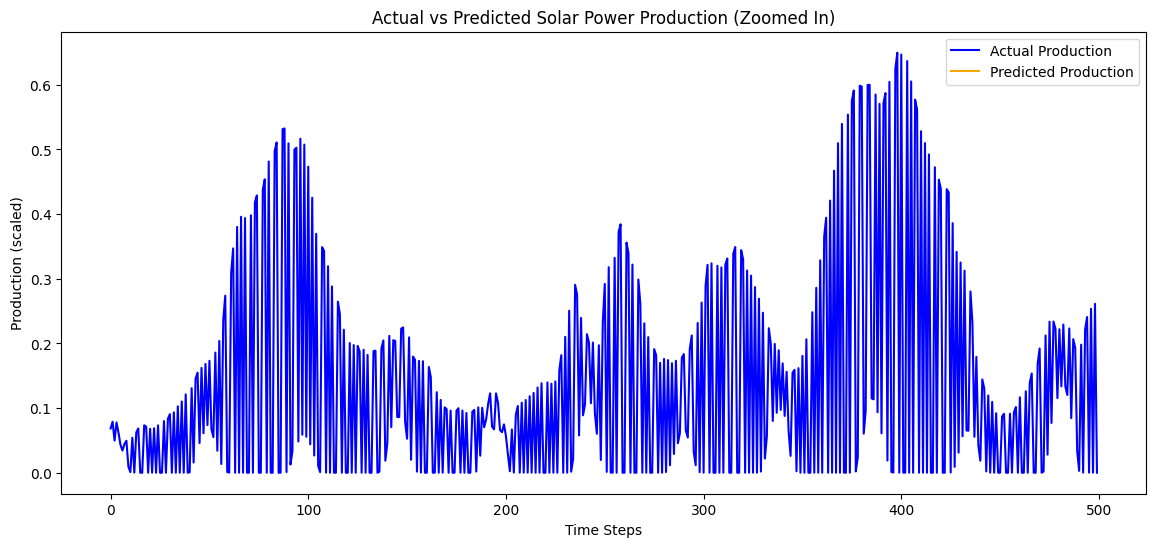

In [ ]:
import numpy as np

# Predict on the training data itself
y_pred = model.predict(X)

# Inverse scale (if you want to bring it back to original production scale)
# Example if you used MinMaxScaler: y_pred = scaler.inverse_transform(y_pred)

# Plot actual vs predicted
import matplotlib.pyplot as plt

''' plt.figure(figsize=(14,6))
plt.plot(y, label='Actual Production')
plt.plot(y_pred, label='Predicted Production')
plt.title('Actual vs Predicted Solar Power Production')
plt.xlabel('Time Steps')
plt.ylabel('Production (scaled)')
plt.legend()
plt.show() '''


plt.figure(figsize=(14,6))
plt.plot(y[:500], label='Actual Production', color='blue')
plt.plot(y_pred[:500], label='Predicted Production', color='orange')
plt.title('Actual vs Predicted Solar Power Production (Zoomed In)')
plt.xlabel('Time Steps')
plt.ylabel('Production (scaled)')
plt.legend()
plt.show()



1869/1869 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step


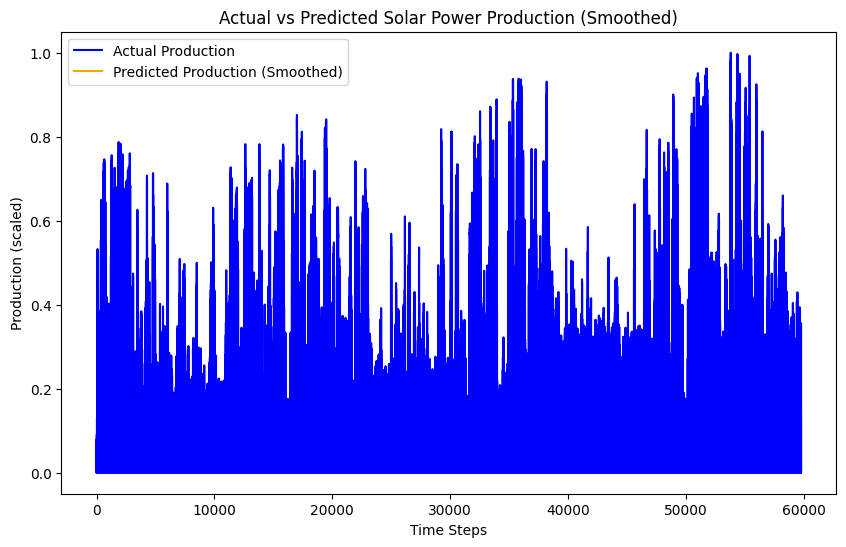

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your full dataset sequence:
# X, y = your prepared sequence dataset

# Predict
y_pred = model.predict(X)

# Flatten both
actual_production = y.flatten()
predicted_production = y_pred.flatten()

# Define a smoothing function
def smooth_predictions(predictions, window_size=5):
    return np.convolve(predictions, np.ones(window_size)/window_size, mode='same')

# Smooth the predictions
smoothed_predictions = smooth_predictions(predicted_production, window_size=5)

# Plot
plt.figure(figsize=(10,6))
plt.plot(actual_production, label='Actual Production', color='blue')
plt.plot(smoothed_predictions, label='Predicted Production (Smoothed)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Production (scaled)')
plt.legend()
plt.title('Actual vs Predicted Solar Power Production (Smoothed)')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

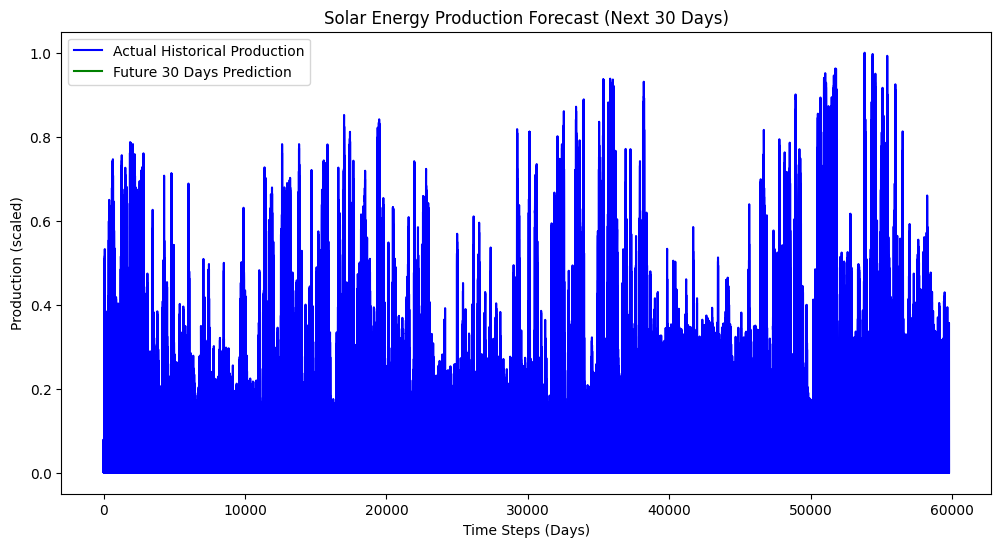

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume: X is your full input sequence and model is already trained

# Start with the last available sequence
last_sequence = X[-1]  # Last window
last_sequence = last_sequence.reshape(1, *last_sequence.shape)  # Reshape for prediction

# List to store future predictions
future_predictions = []

# Predict next 30 days
for _ in range(30):
    # Predict next value
    next_value = model.predict(last_sequence)[0, 0]  # Model expects 3D input
    future_predictions.append(next_value)

    # Update the sequence
    next_sequence = np.append(last_sequence[:,1:,:], [[ [next_value] ]], axis=1)
    last_sequence = next_sequence

# Convert predictions to array
future_predictions = np.array(future_predictions)

# Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y)), y.flatten(), label='Actual Historical Production', color='blue')
plt.plot(range(len(y), len(y)+30), future_predictions, label='Future 30 Days Prediction', color='green')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Production (scaled)')
plt.legend()
plt.title('Solar Energy Production Forecast (Next 30 Days)')
plt.show()


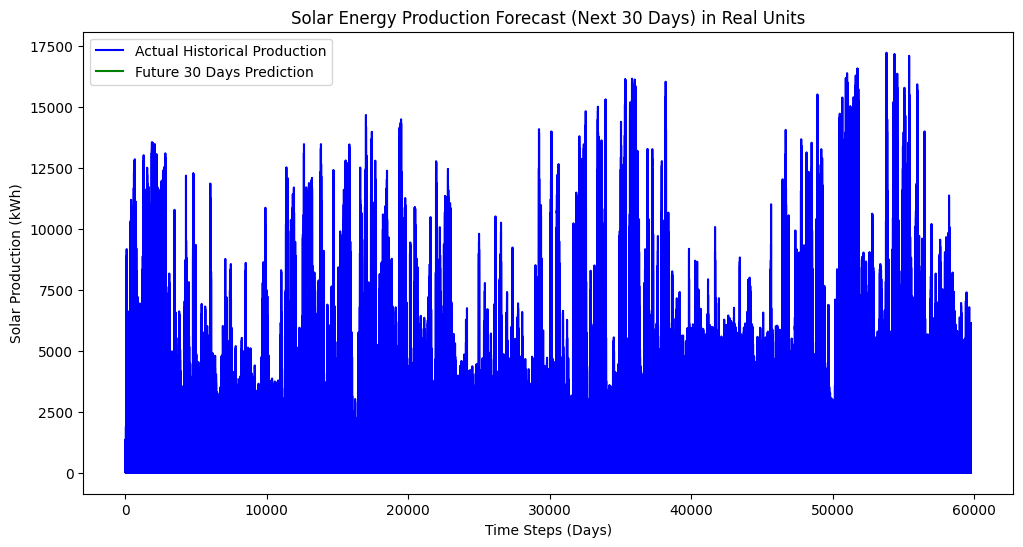

In [ ]:
# Step 1: Inverse transform (after reshaping)
y_real = scaler.inverse_transform(y.reshape(-1, 1))
future_predictions_real = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Step 2: Plot
plt.figure(figsize=(12,6))
plt.plot(range(len(y_real)), y_real.flatten(), label='Actual Historical Production', color='blue')
plt.plot(range(len(y_real), len(y_real)+30), future_predictions_real.flatten(), label='Future 30 Days Prediction', color='green')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Solar Production (kWh)')
plt.legend()
plt.title('Solar Energy Production Forecast (Next 30 Days) in Real Units')
plt.show()


In [ ]:
electricity_cost_per_kWh = 8   # Example: ₹8 per unit (normal electricity)
solar_cost_per_kWh = 5         # Example: ₹5 per unit (solar electricity)

print("y_real:\n", y_real[:5])
print("future_predictions_real:\n", future_predictions_real[:5])
print("electricity_cost_per_kWh:", electricity_cost_per_kWh)
print("solar_cost_per_kWh:", solar_cost_per_kWh)


y_real:
 [[1178.]
 [1359.]
 [ 857.]
 [1339.]
 [1064.]]
future_predictions_real:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
electricity_cost_per_kWh: 8
solar_cost_per_kWh: 5


In [ ]:
# Temporarily assign original values for demonstration
y_real_clean = y_real
future_predictions_real_clean = future_predictions_real


print("y_real_clean shape:", y_real_clean.shape)
print("future_predictions_real_clean shape:", future_predictions_real_clean.shape)


y_real_clean shape: (59782, 1)
future_predictions_real_clean shape: (30, 1)


In [ ]:
# Fix units: Convert Wh to kWh
total_production_real = np.sum(y_real_clean) / 1000
total_production_predicted = np.sum(future_predictions_real_clean) / 1000

# Calculate total costs and savings
total_cost_normal = total_production_real * electricity_cost_per_kWh
total_cost_solar = total_production_real * solar_cost_per_kWh
savings_last_period = total_cost_normal - total_cost_solar

total_cost_normal_future = total_production_predicted * electricity_cost_per_kWh
total_cost_solar_future = total_production_predicted * solar_cost_per_kWh
savings_next_30days = total_cost_normal_future - total_cost_solar_future

# Print savings
print(f"Estimated total saving in last period: ₹{savings_last_period:.2f}")
print(f"Estimated total saving in next 30 days: ₹{savings_next_30days:.2f}")


Estimated total saving in last period: ₹nan
Estimated total saving in next 30 days: ₹nan


In [ ]:
# Step 1: Calculate number of months
total_days = len(y_real_clean)   # y_real_clean is your real production array
days_in_month = 30  # assuming 30 days per month
number_of_months = total_days / days_in_month

# Step 2: Calculate average monthly saving
average_monthly_saving = savings_last_period / number_of_months

# Step 3: Assume installation cost
installation_cost = 100000  # ₹1 lakh (you can adjust this value)

# Step 4: Calculate ROI
roi_months = installation_cost / average_monthly_saving
roi_years = roi_months / 12

# Print Results
print(f" Lifetime Savings: ₹{savings_last_period:,.2f}")
print(f" Predicted Savings (Next 30 Days): ₹{savings_next_30days:,.2f}")
print(f" Average Monthly Saving: ₹{average_monthly_saving:,.2f}")
print(f" Your Estimated ROI: {roi_years:.2f} years")


 Lifetime Savings: ₹nan
 Predicted Savings (Next 30 Days): ₹nan
 Average Monthly Saving: ₹nan
 Your Estimated ROI: nan years


🔋 Total Energy Predicted (next 30 days): nan kWh
💰 Total Savings vs Grid: ₹nan
📈 Estimated Break-even Time: inf months


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


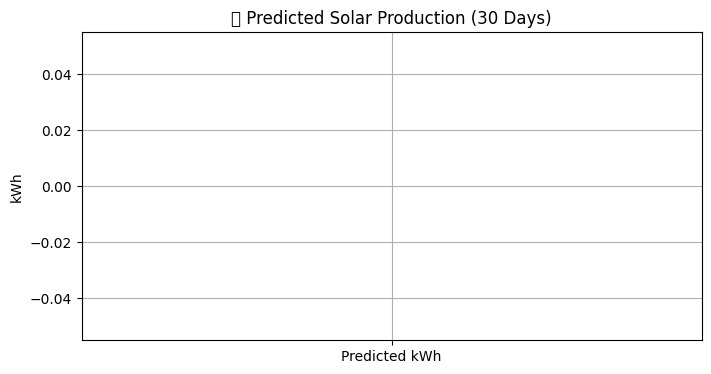

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==== CONFIG ====
grid_price = 6.5  # ₹ per kWh (normal electricity)
solar_price = 3.5  # ₹ per kWh (seller's price)
installation_cost = 100000  # ₹ (solar panel setup cost)

# ==== CALCULATE FINANCIAL SAVINGS ====
predicted_kWh = np.sum(future_predictions)
savings_per_kWh = grid_price - solar_price
total_savings = predicted_kWh * savings_per_kWh

# ==== CALCULATE ROI ====
monthly_savings = total_savings
months_to_roi = installation_cost / monthly_savings if monthly_savings > 0 else float('inf')

# ==== DISPLAY RESULTS ====
print(f"🔋 Total Energy Predicted (next 30 days): {predicted_kWh:.2f} kWh")
print(f"💰 Total Savings vs Grid: ₹{total_savings:.2f}")
print(f"📈 Estimated Break-even Time: {months_to_roi:.1f} months")

# ==== PLOT SAVINGS ====
plt.figure(figsize=(8,4))
plt.bar(['Predicted kWh'], [predicted_kWh], color='orange')
plt.title('🔮 Predicted Solar Production (30 Days)')
plt.ylabel('kWh')
plt.grid(True)
plt.show()
